In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style="whitegrid"
%matplotlib inline

In [3]:
#used to grad data from the web
import requests

#We'll also use StringIO to work with csv file , the DataFrame will require  a .read() method
from io import StringIO

In [4]:
url="http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source=requests.get(url).text

poll_data=StringIO(source)

In [5]:
poll_df=pd.read_csv(poll_data)

In [6]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 14 columns):
Pollster                  589 non-null object
Start Date                589 non-null object
End Date                  589 non-null object
Entry Date/Time (ET)      589 non-null object
Number of Observations    567 non-null float64
Population                589 non-null object
Mode                      589 non-null object
Obama                     589 non-null int64
Romney                    589 non-null int64
Undecided                 422 non-null float64
Pollster URL              589 non-null object
Source URL                587 non-null object
Partisan                  589 non-null object
Affiliation               589 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 64.5+ KB


In [7]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000.0,Likely Voters,Live Phone,47,47,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000.0,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872.0,Likely Voters,Automated Phone,48,48,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041.0,Likely Voters,Internet,47,47,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500.0,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


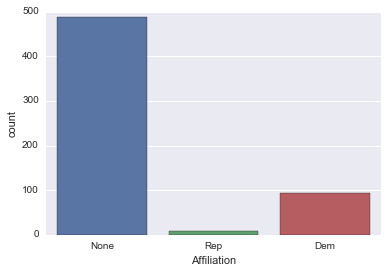

In [8]:
#less check affiliations 
sns.countplot("Affiliation",data=poll_df)

It can be seen that most were were not affiliated. However tehere were quite a number of affilates of Democrats

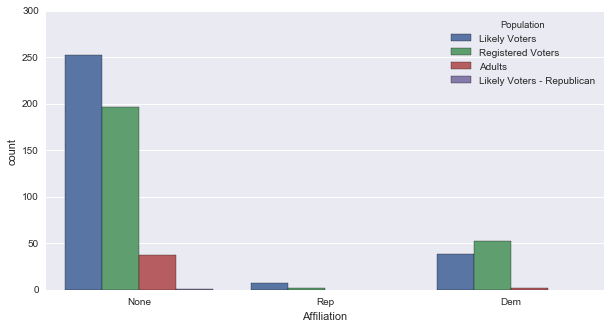

In [9]:
plt.figure(figsize=(10,5))
sns.countplot("Affiliation",data=poll_df,hue="Population")

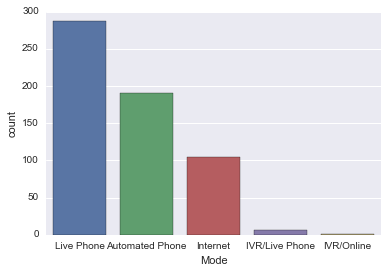

In [10]:
#checking most popular voting mode
sns.countplot("Mode",data=poll_df)

In [11]:
avg=pd.DataFrame(poll_df.mean())

#before dropping mean value of Number of Observation
avg


,0
Number of Observations,1296.197531
Obama,46.772496
Romney,44.573854
Undecided,6.549763


In [12]:
#dropping mean value of Number of Observation as it is not of our interest

avg.drop("Number of Observations",axis=0,inplace=True)

avg

,0
Obama,46.772496
Romney,44.573854
Undecided,6.549763


In [13]:
std=pd.DataFrame(poll_df.std())

std.drop("Number of Observations",axis=0,inplace=True)

In [14]:
std

,0
Obama,2.448627
Romney,2.927711
Undecided,3.702235


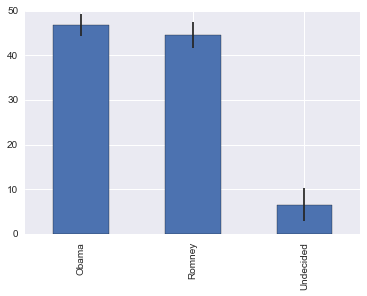

In [15]:
avg.plot(yerr=std,kind="bar",legend=False)

In [16]:
poll_avg=pd.concat([avg,std],axis=1)

In [17]:
poll_avg

,0,0
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


In [18]:
poll_avg.columns=["Average","Std"]

In [19]:
poll_avg

,Average,Std
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


In [20]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000.0,Likely Voters,Live Phone,47,47,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000.0,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872.0,Likely Voters,Automated Phone,48,48,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041.0,Likely Voters,Internet,47,47,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500.0,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


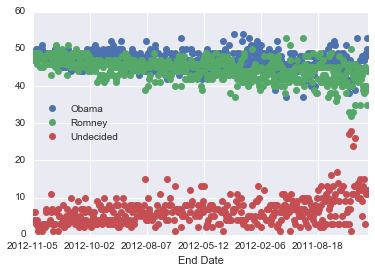

In [21]:
plt.figure(figsize=(10,6))
poll_df.plot(x="End Date",y=["Obama","Romney","Undecided"],linestyle="",marker="o")

In [22]:
from datetime import datetime

In [23]:
#lets look at the voter percentage differnce between obama and romney
#here take obama-Romney/100
poll_df["Difference"]=(poll_df.Obama-poll_df.Romney)/100
poll_df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000.0,Likely Voters,Live Phone,47,47,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000.0,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,0.01
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872.0,Likely Voters,Automated Phone,48,48,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041.0,Likely Voters,Internet,47,47,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,0.00
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500.0,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01
5,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:51:48 UTC,712.0,Likely Voters,Live Phone,50,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,0.01
6,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26 2000-01-01 15:31:23 UTC,740.0,Likely Voters,Internet,49,47,3.0,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,0.02
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05 2000-01-01 16:12:48 UTC,4725.0,Likely Voters,Internet,48,46,4.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,0.02
8,ARG,2012-11-02,2012-11-04,2012-11-05 2000-01-01 13:06:54 UTC,1200.0,Likely Voters,Live Phone,49,49,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,0.00
9,CNN,2012-11-02,2012-11-04,2012-11-04 2000-01-01 20:16:09 UTC,693.0,Likely Voters,Live Phone,49,49,2.0,http://elections.huffingtonpost.com/pollster/p...,http://i2.cdn.turner.com/cnn/2012/images/11/04...,Nonpartisan,None,0.00


In [24]:
poll_df=poll_df.groupby(["Start Date"],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,0.09


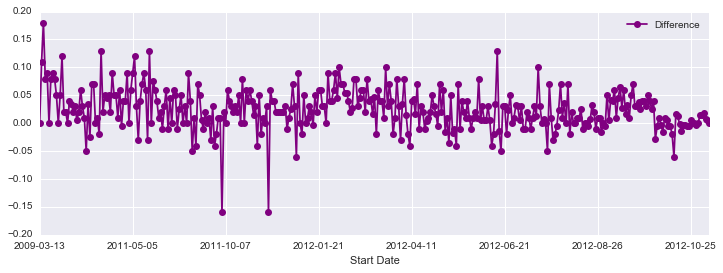

In [25]:
poll_df.plot("Start Date","Difference",figsize=(12,4),marker="o",linestyle="-",color="purple")

In [26]:
#looking for for october 
#use loop to create xlimit with all the moth of october
#the loop over allow us to find all the index of the october month
row_in=0
xlimit=[]

for date in poll_df["Start Date"]:
    if date[0:7]=="2012-10":
        xlimit.append(row_in)
        row_in+=1
    else:
        row_in+=1
        
print(min(xlimit))
print(max(xlimit))

329
356


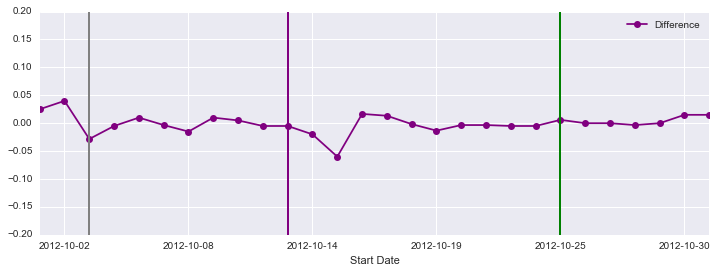

In [27]:
poll_df.plot("Start Date","Difference",figsize=(12,4),marker="o",linestyle="-",color="purple",xlim=(329,356))
#from wiki the debate was on oct 3, 11 and 22
#Lets create vertical line for each data when the devate occured

#creaitng marker in each debate point
#oct 3
plt.axvline(x=329+2,linewidth=2,color="grey")

#oct 11
plt.axvline(x=329+10,linewidth=2,color="purple")

#cot 22
plt.axvline(x=329+21,linewidth=2,color="green")


It can be seen that after first debate sentiment for obama increased. After scond debate sentiment for obama seem to have decreased. Finally after third debate there seem to be no change. This suggest that obama did poorly on the second debate and did well on the first debate which is not true as far as his perfomance level of debates are concerned.

### Now the focus shall be on the donor dataset

In [28]:
pwd

'C:\\Users\\Ashbin\\Documents\\learn programming\\python\\wesite\\udemy\\Learning Python for data analysis\\source codes\\Section 9 - Data Projects\\Election Project'

In [29]:
donor_df=pd.read_csv("Election_Donor_Data.csv", low_memory=False)

In [30]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [31]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [32]:
donor_df["contb_receipt_amt"].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 128.68          1
 60.71           1
 139.68          1
 143.43          1
 155.43          1
 160.93          1
 190.68          1
 195.18          1
 198.18          1
 62.46           1
 93.88           1
 101.88          1
 34.46           1
 25.96           1
 26.21           1
 28.96           1
 29.46           1
 30.46           1
 31.96           1
 33.71           1
 36.46           1
 54.71      

In [33]:
don_mean=donor_df["contb_receipt_amt"].mean()

don_std=donor_df["contb_receipt_amt"].std()

print("The average donation was %.2f with a std of %.2f"%(don_mean,don_std))

The average donation was 298.24 with a std of 3749.67


In [34]:
top_donor=donor_df["contb_receipt_amt"].copy()
top_donor=top_donor[top_donor>0]

top_donor.sort_values(inplace=True)
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

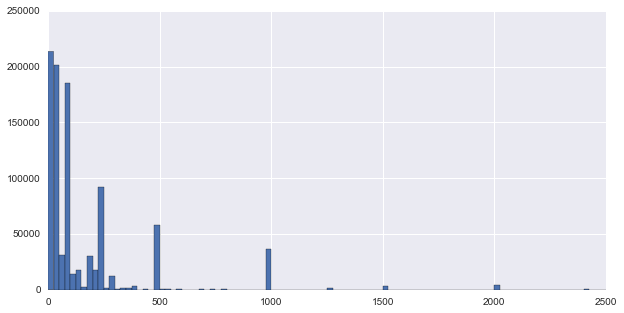

In [35]:
com_dom=top_donor[top_donor<2500]
plt.figure(figsize=(10,5))
com_dom.hist(bins=100)

In [36]:
candidates=donor_df.cand_nm.unique()

candidates


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [37]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}


In [39]:
#mappint party to the candidate
#here the republicans are differentiated from Democrat
donor_df["party"]=donor_df.cand_nm.map(party_map)

In [40]:
donor_df=donor_df[donor_df.contb_receipt_amt>0]

In [41]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [43]:
#lte look at total number of donation
donor_df.groupby("cand_nm")["contb_receipt_amt"].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [46]:
#checking the sum of the donation
donor_df.groupby("cand_nm")["contb_receipt_amt"].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [48]:
#lets try to make the above result more readable
cand_amount=donor_df.groupby("cand_nm")["contb_receipt_amt"].sum()

i=0

for don in cand_amount:
    print("The candindate %s raise %.0f dollars"%(cand_amount.index[i],don))
    print("\n")
    i+=1

The candindate Bachmann, Michelle raise 2711439 dollars


The candindate Cain, Herman raise 7101082 dollars


The candindate Gingrich, Newt raise 12832770 dollars


The candindate Huntsman, Jon raise 3330373 dollars


The candindate Johnson, Gary Earl raise 566962 dollars


The candindate McCotter, Thaddeus G raise 39030 dollars


The candindate Obama, Barack raise 135877427 dollars


The candindate Paul, Ron raise 21009620 dollars


The candindate Pawlenty, Timothy raise 6004819 dollars


The candindate Perry, Rick raise 20305754 dollars


The candindate Roemer, Charles E. 'Buddy' III raise 373010 dollars


The candindate Romney, Mitt raise 88335908 dollars


The candindate Santorum, Rick raise 11043159 dollars




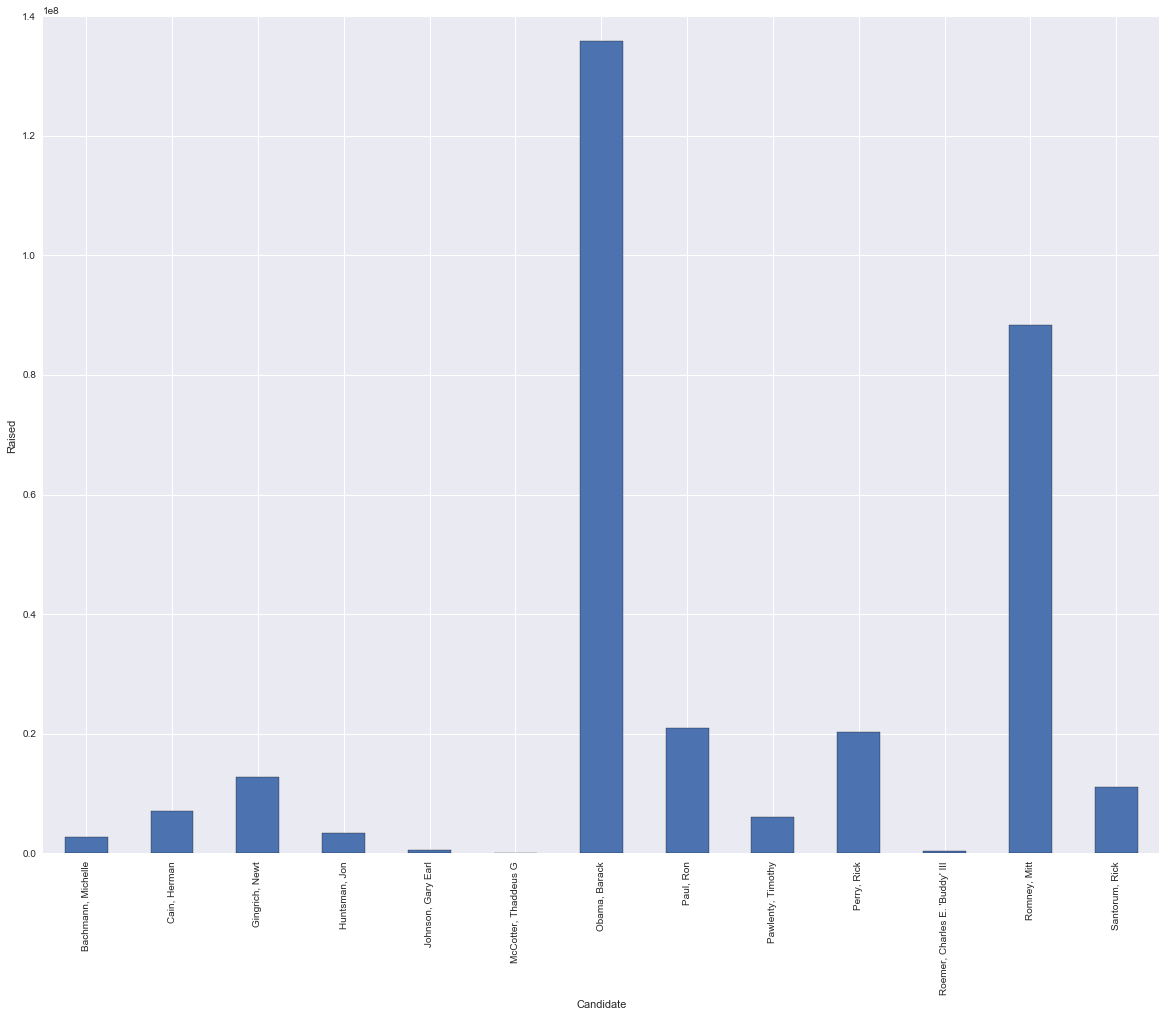

In [55]:
cand_amount.plot(kind="bar",figsize=(20,15))
plt.xlabel("Candidate")
plt.ylabel("Raised")

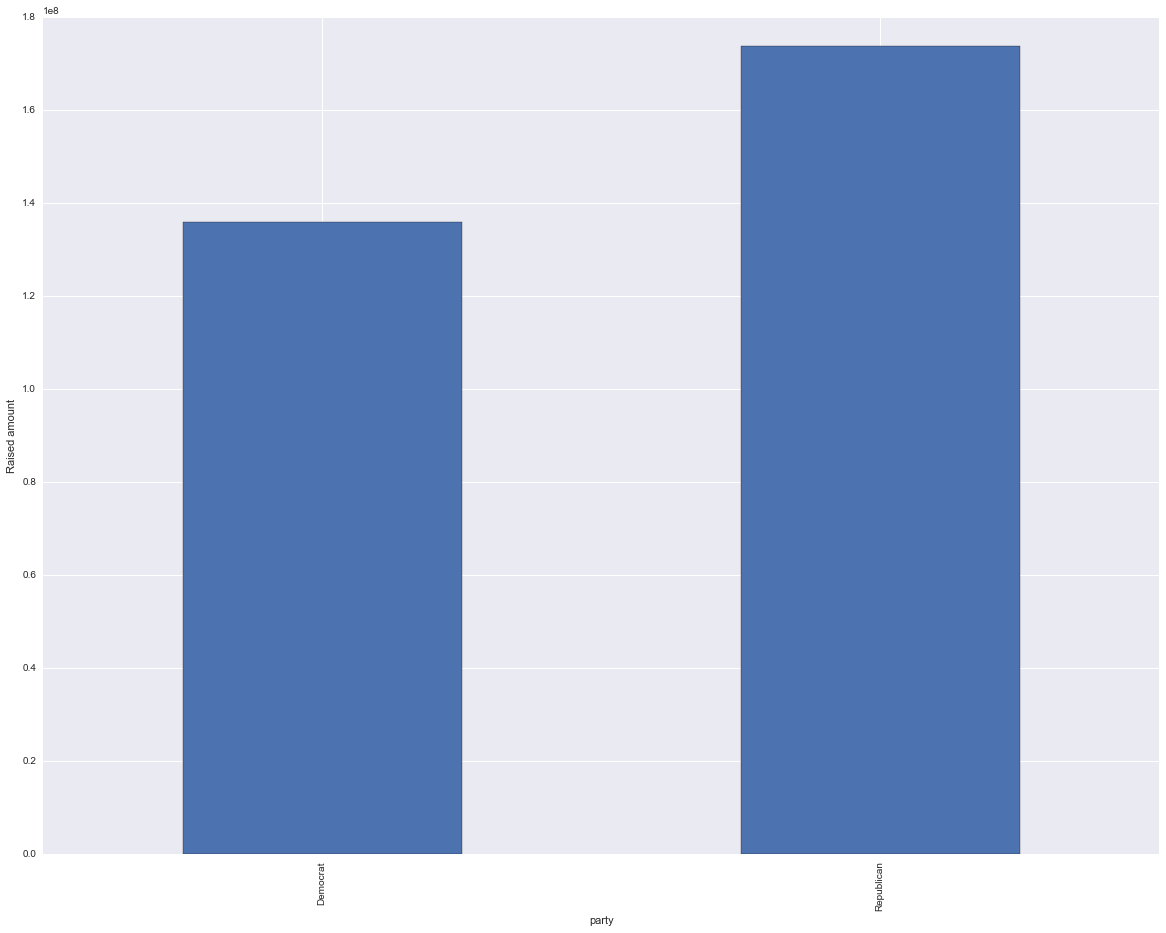

In [59]:
#comparing total donation abount accoring to each party
donor_df.groupby("party")["contb_receipt_amt"].sum().plot(kind="bar",figsize=(20,15))
plt.ylabel("Raised amount")

In [67]:
#look at the ocupation of the donors
occupation_df=donor_df.pivot_table("contb_receipt_amt",
                            index="contbr_occupation",
                            columns="party",
                             aggfunc="sum")

In [68]:
occupation_df

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.60
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.00
(RETIRED),NaN,250.00
-,5000.0,2114.80


In [69]:
occupation_df.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [70]:
occupation_df.tail()

party,Democrat,Republican
contbr_occupation,,
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN
\NONE\,NaN,250.0
~,NaN,75.0


In [71]:
occupation_df.shape

(45067, 2)

In [72]:
occupation_df=occupation_df[occupation_df.sum(1)>1000000]

In [73]:
occupation_df.shape

(31, 2)

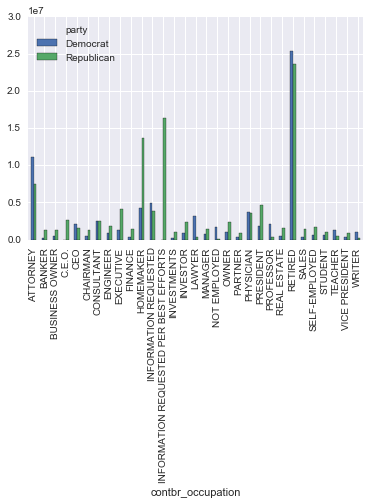

In [74]:
occupation_df.plot(kind="bar")

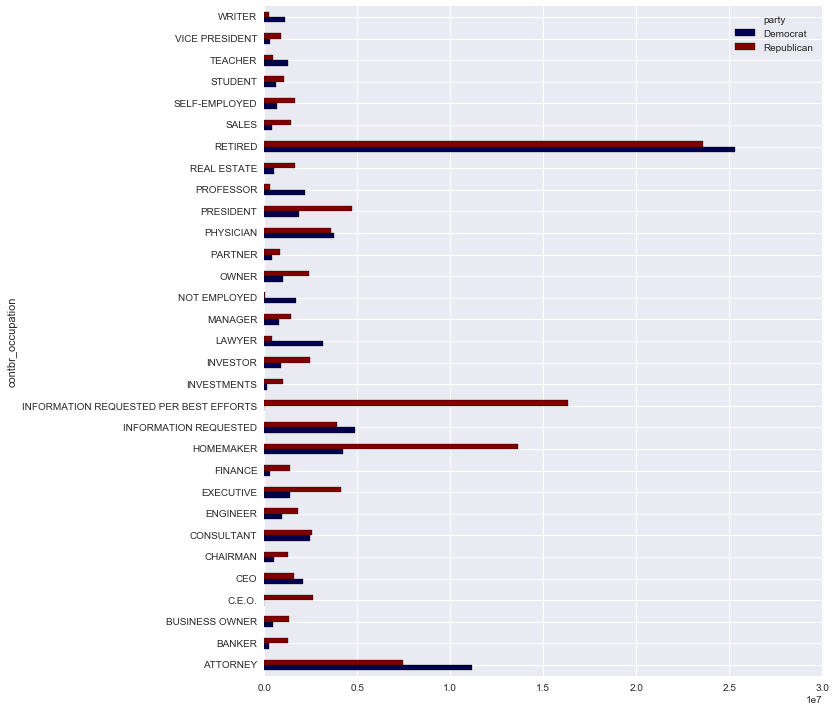

In [75]:
#lets have horizontal bar graph
occupation_df.plot(kind="barh",figsize=(10,12),colormap="seismic")

In [76]:
occupation_df.drop(["INFORMATION REQUESTED PER BEST EFFORTS","INFORMATION REQUESTED"],axis=0,inplace=True)

c:\python3.5\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
occupation_df

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06


In [81]:
#combine CEO and C.E.O rows
occupation_df.loc["CEO"]=occupation_df.loc["CEO"]+occupation_df.loc["C.E.O."]

#now drop C.E.O
occupation_df.drop("C.E.O.",inplace=True)

c:\python3.5\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\python3.5\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\python3.5\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [82]:
occupation_df

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
CEO,2074974.79,4.211041e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
FINANCE,296031.40,1.402515e+06


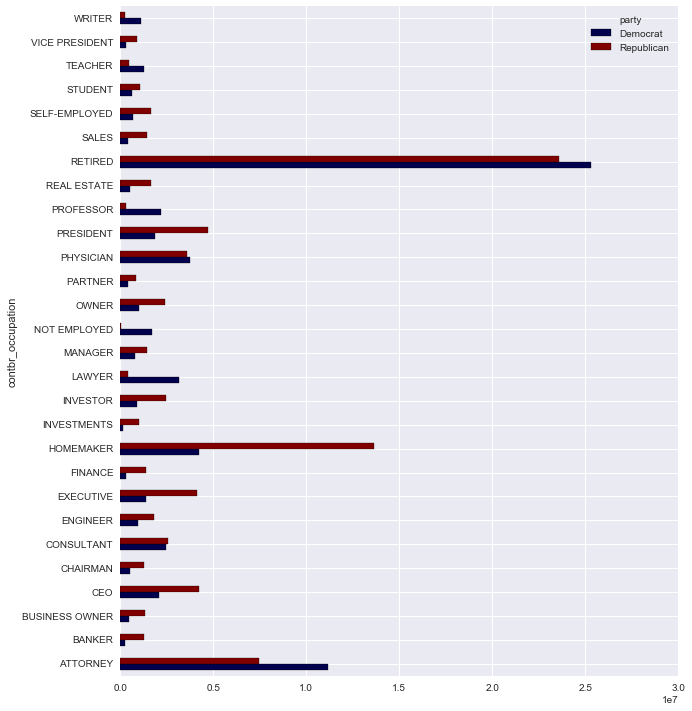

In [83]:
occupation_df.plot(kind="barh",figsize=(10,12),cmap="seismic")